<a href="https://colab.research.google.com/github/anesmu/HAND-DETECTOR-YOLOV8/blob/main/yolo8_hand_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Antes de comenzar 
Asegurarnos el acceso a la GPU. En caso de problemas ir a `Editar` -> `Configuración del cuaderno` -> `Aceleración de hardware`, haz click en `GPU`, y luego en `Guardar`.

In [1]:
!nvidia-smi

Sat Feb 11 17:40:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    52W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)
DATA_LOCATION = os.path.join(HOME, "data")
print(DATA_LOCATION)


/content
/content/data


In [3]:
# Libreria para quitar el resultado de código que no es necesario
!pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.9 MB/s eta 0:00:00


## Instalación YOLOv8

⚠️ **DISCLAIMER** -> YOLOv8 está aún en pleno desarrollo. Y se introducen cambios casi semanalmente. Lo que podría llevar a errores en el cuaderno.

In [4]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 24.5/166.8 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

# Descarga del dataset personalizado de [Github](https://github.com/anesmu/HAND-DETECTOR-YOLOV8)

In [6]:
import os

HOME = os.getcwd()
print(HOME)

/content


In [7]:
%%capture
!wget -P {HOME} https://github.com/anesmu/HAND-DETECTOR-YOLOV8/blob/main/data.zip?raw=true

In [8]:
%%capture 
!unzip {HOME}/data.zip?raw=true
!rm -rf {HOME}/data.zip?raw=true


# Comienza el entrenamiento

In [9]:
!yolo task=detect mode=train model=yolov8s.pt data={DATA_LOCATION}/data.yaml epochs=50 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 37.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch160.jpg
events.out.tfevents.1676137268.6b20a4761858.2088.0  train_batch161.jpg
F1_curve.png					    train_batch162.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


# Matriz de confusión

/content


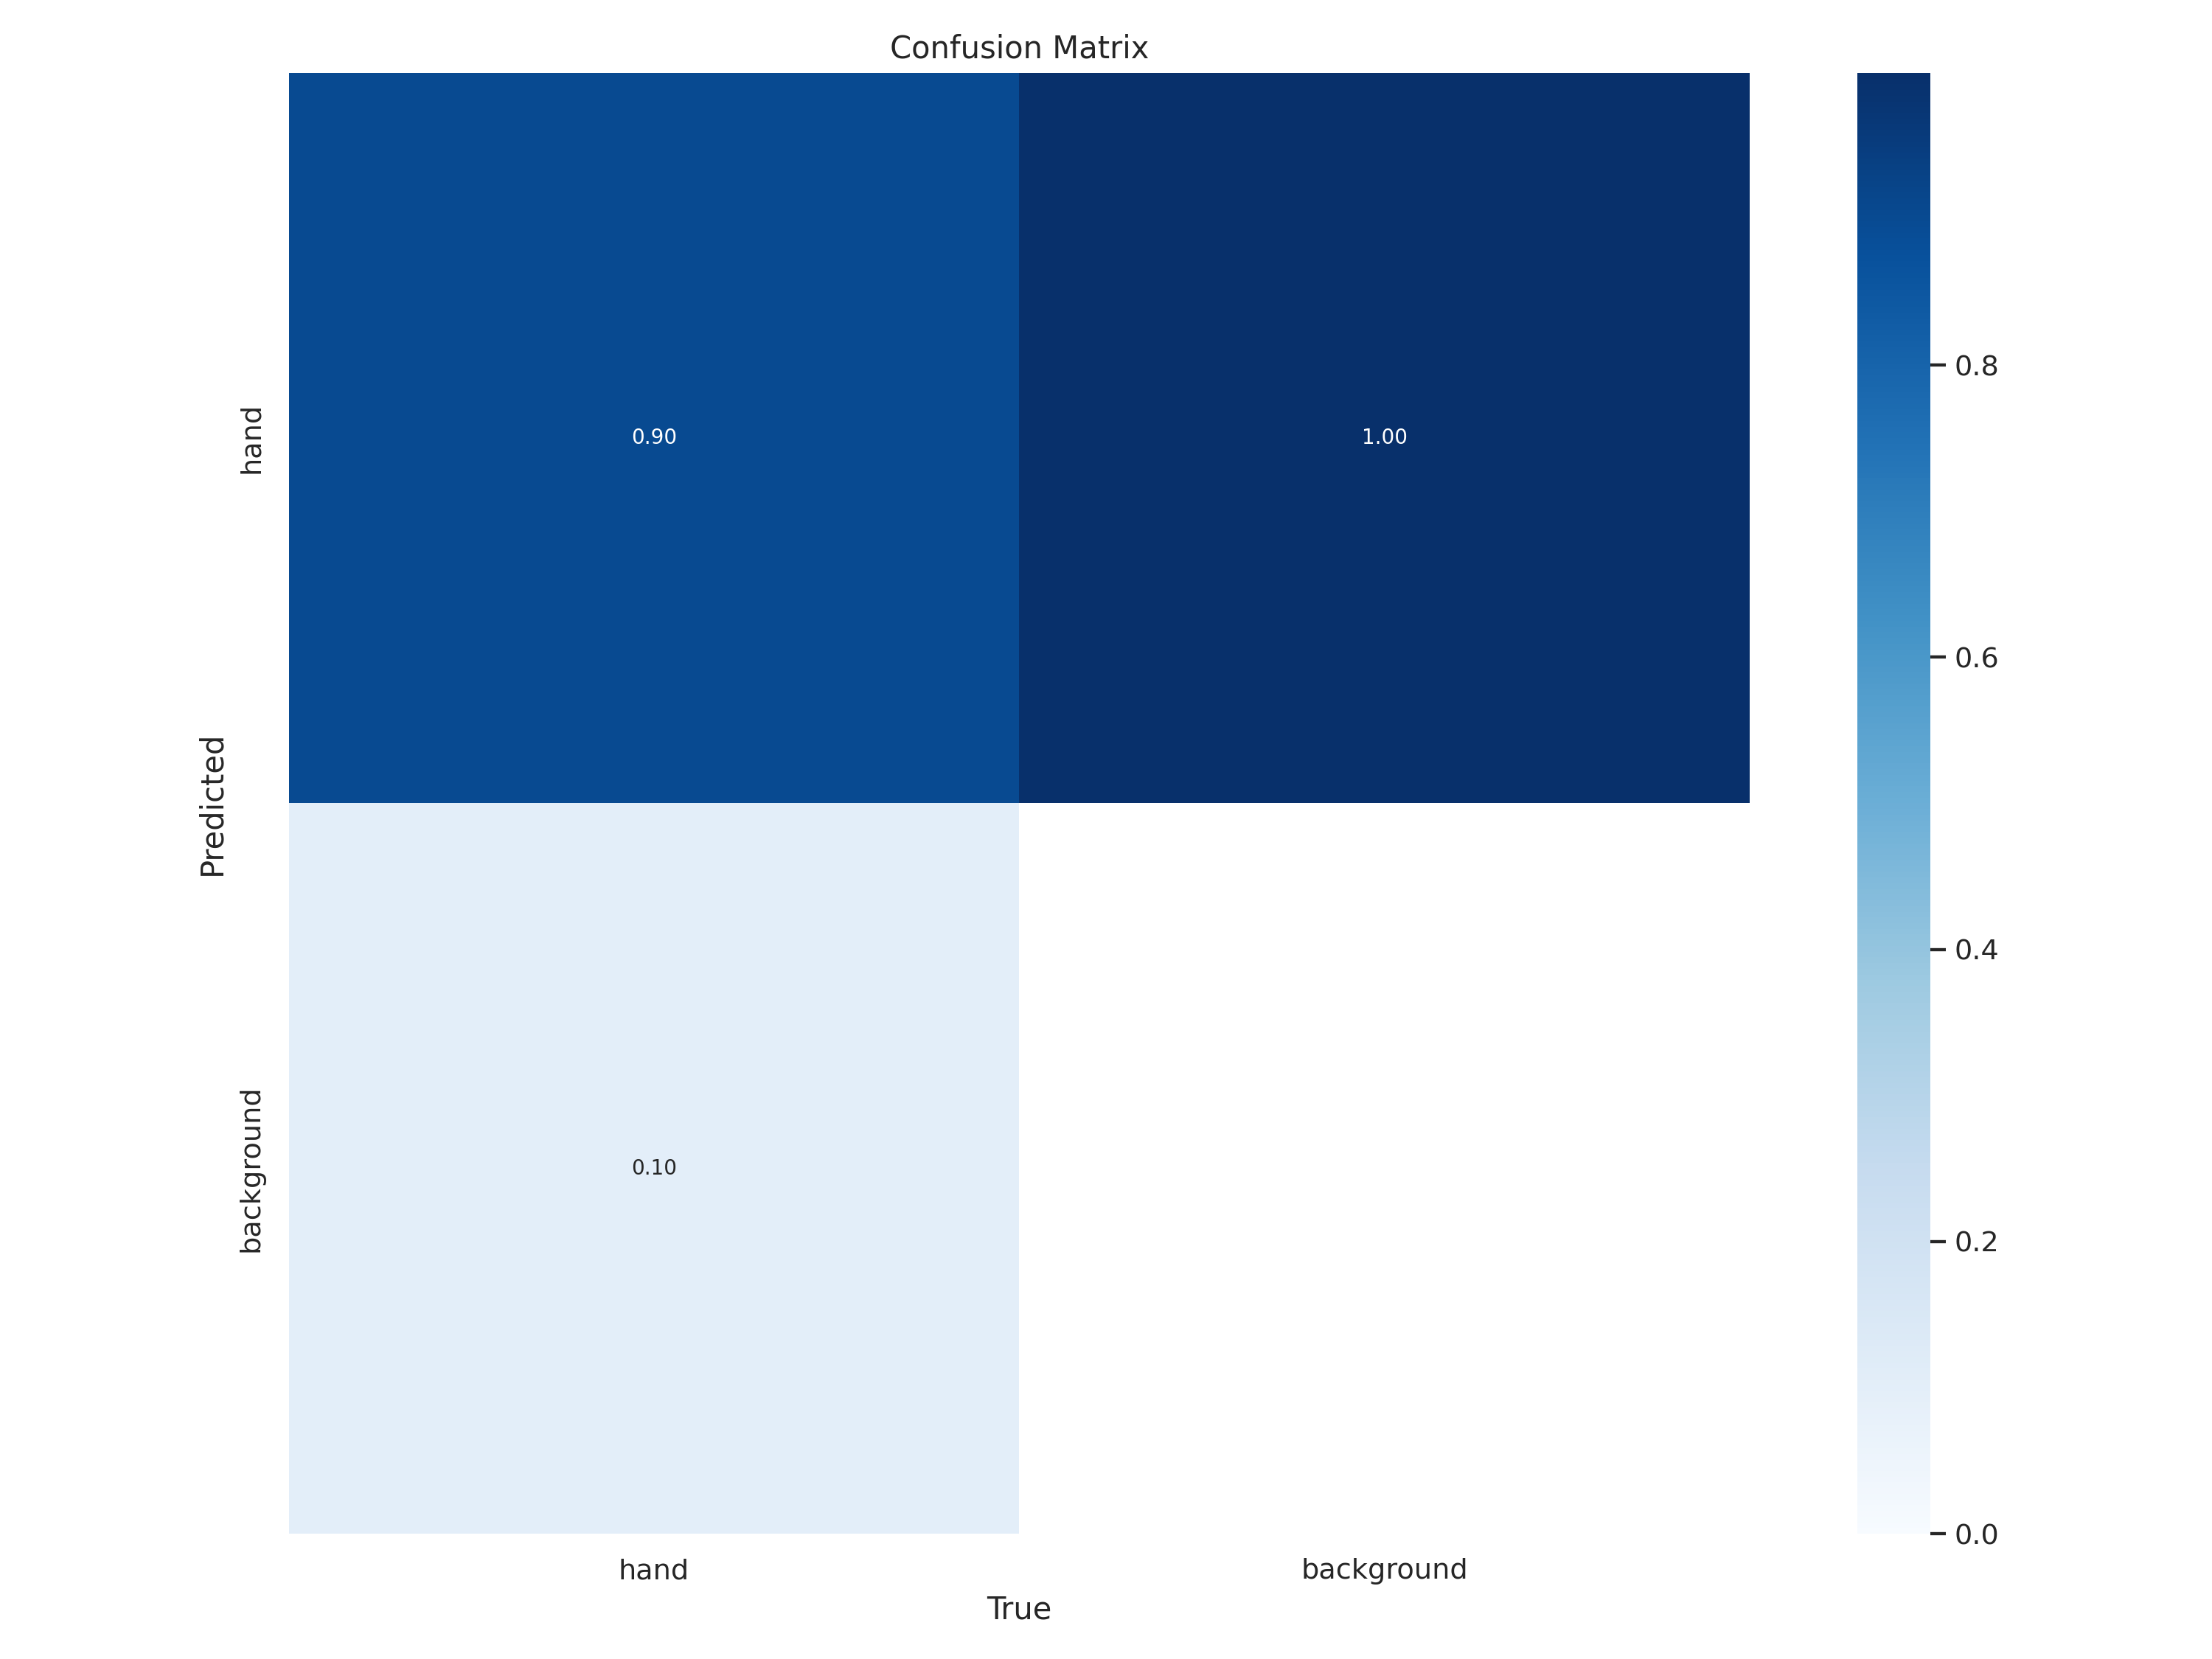

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

# Pérdida de entrenamiento y validación

/content


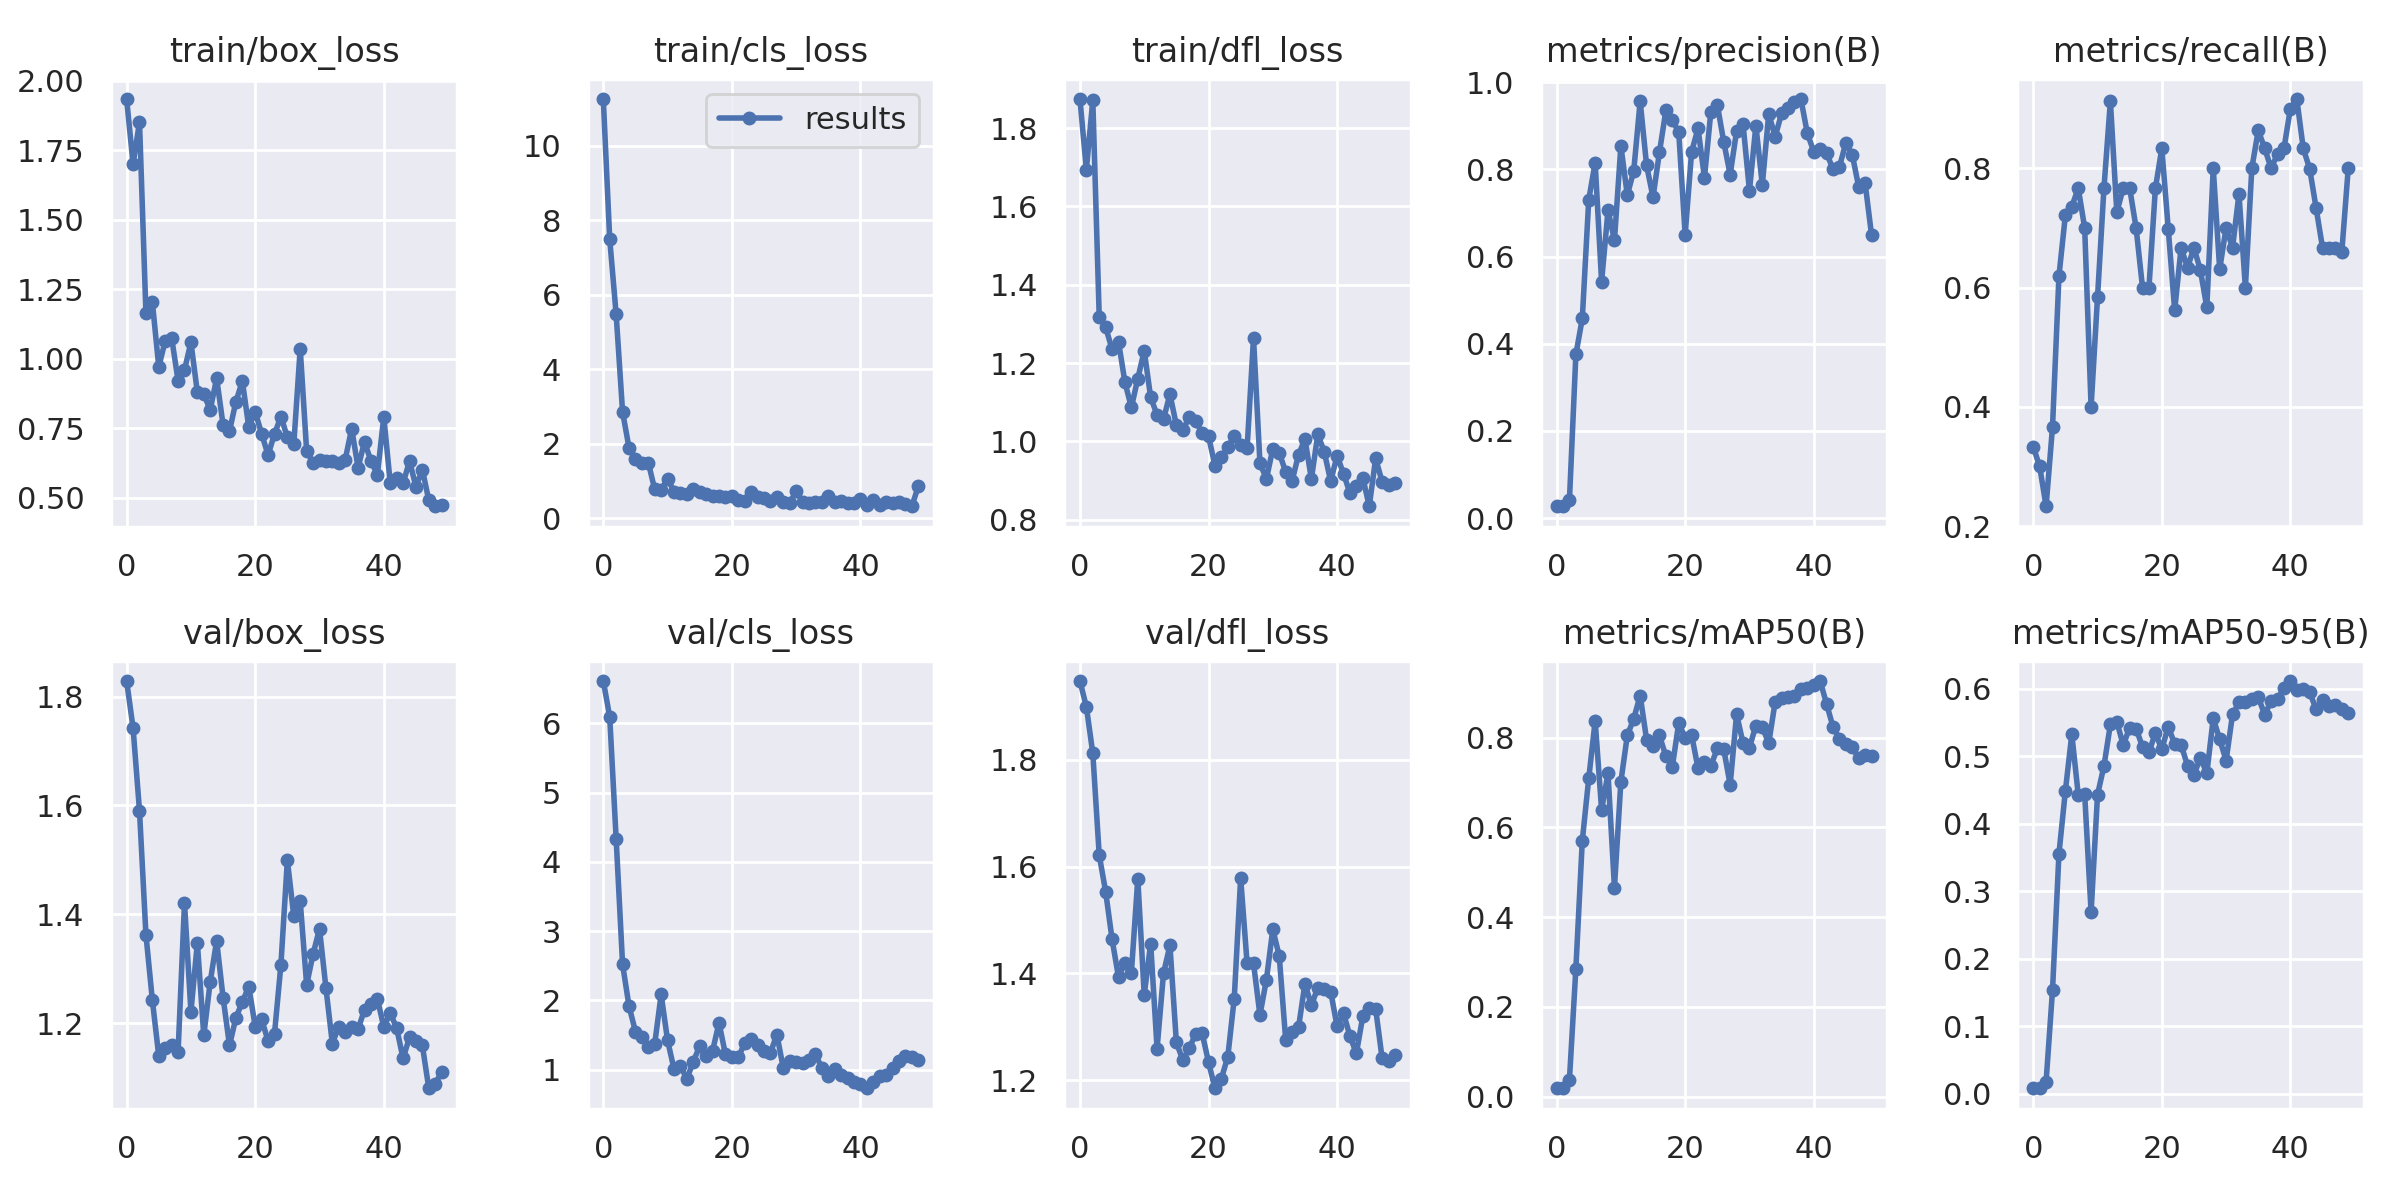

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


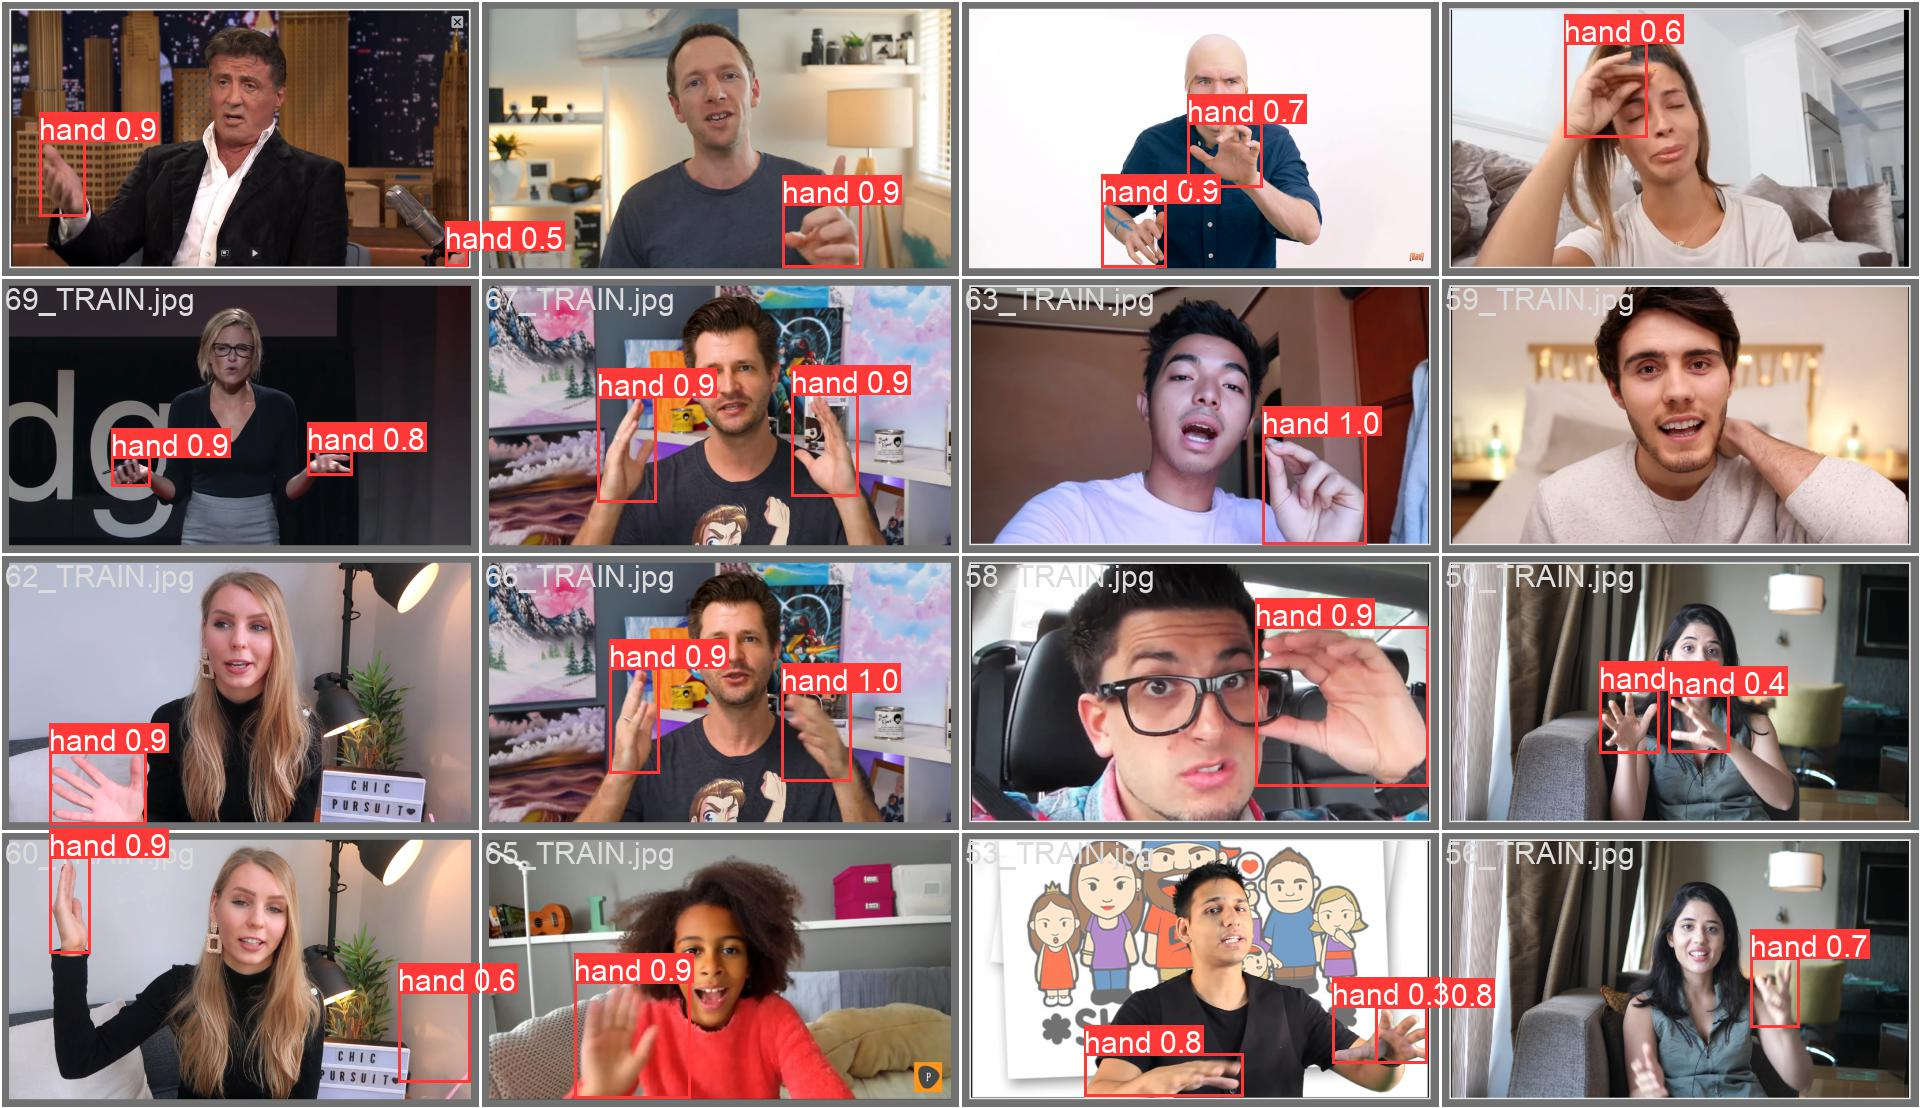

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validación del modelo personalizado

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={DATA_LOCATION}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/data/val/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.25it/s]
                   all         20         30       0.84        0.9      0.918      0.613
Speed: 2.7ms pre-process, 5.2ms inference, 0.0ms loss, 0.8ms post-process per image


# Inferencia del modelo personalizado

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={DATA_LOCATION}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/18 /content/data/test/images/10.jpg: 544x800 2 hands, 19.7ms
image 2/18 /content/data/test/images/11.jpg: 544x800 2 hands, 12.7ms
image 3/18 /content/data/test/images/12.jpg: 544x800 2 hands, 12.6ms
image 4/18 /content/data/test/images/13.jpg: 544x800 2 hands, 12.2ms
image 5/18 /content/data/test/images/15.jpg: 544x800 2 hands, 12.9ms
image 6/18 /content/data/test/images/16.jpg: 544x800 3 hands, 12.0ms
image 7/18 /content/data/test/images/17.jpg: 544x800 2 hands, 12.4ms
image 8/18 /content/data/test/images/18.jpg: 544x800 2 hands, 12.5ms
image 9/18 /content/data/test/images/19.jpg: 544x800 2 hands, 12.1ms
image 10/18 /content/data/test/images/2.jpg: 544x800 2 hands, 12.0ms
image 11/18 /content/data/test/images/20.jpg: 544x800 2 hands, 12.5ms
image 12/18 /content/data/test/images/3.jpg: 544x8

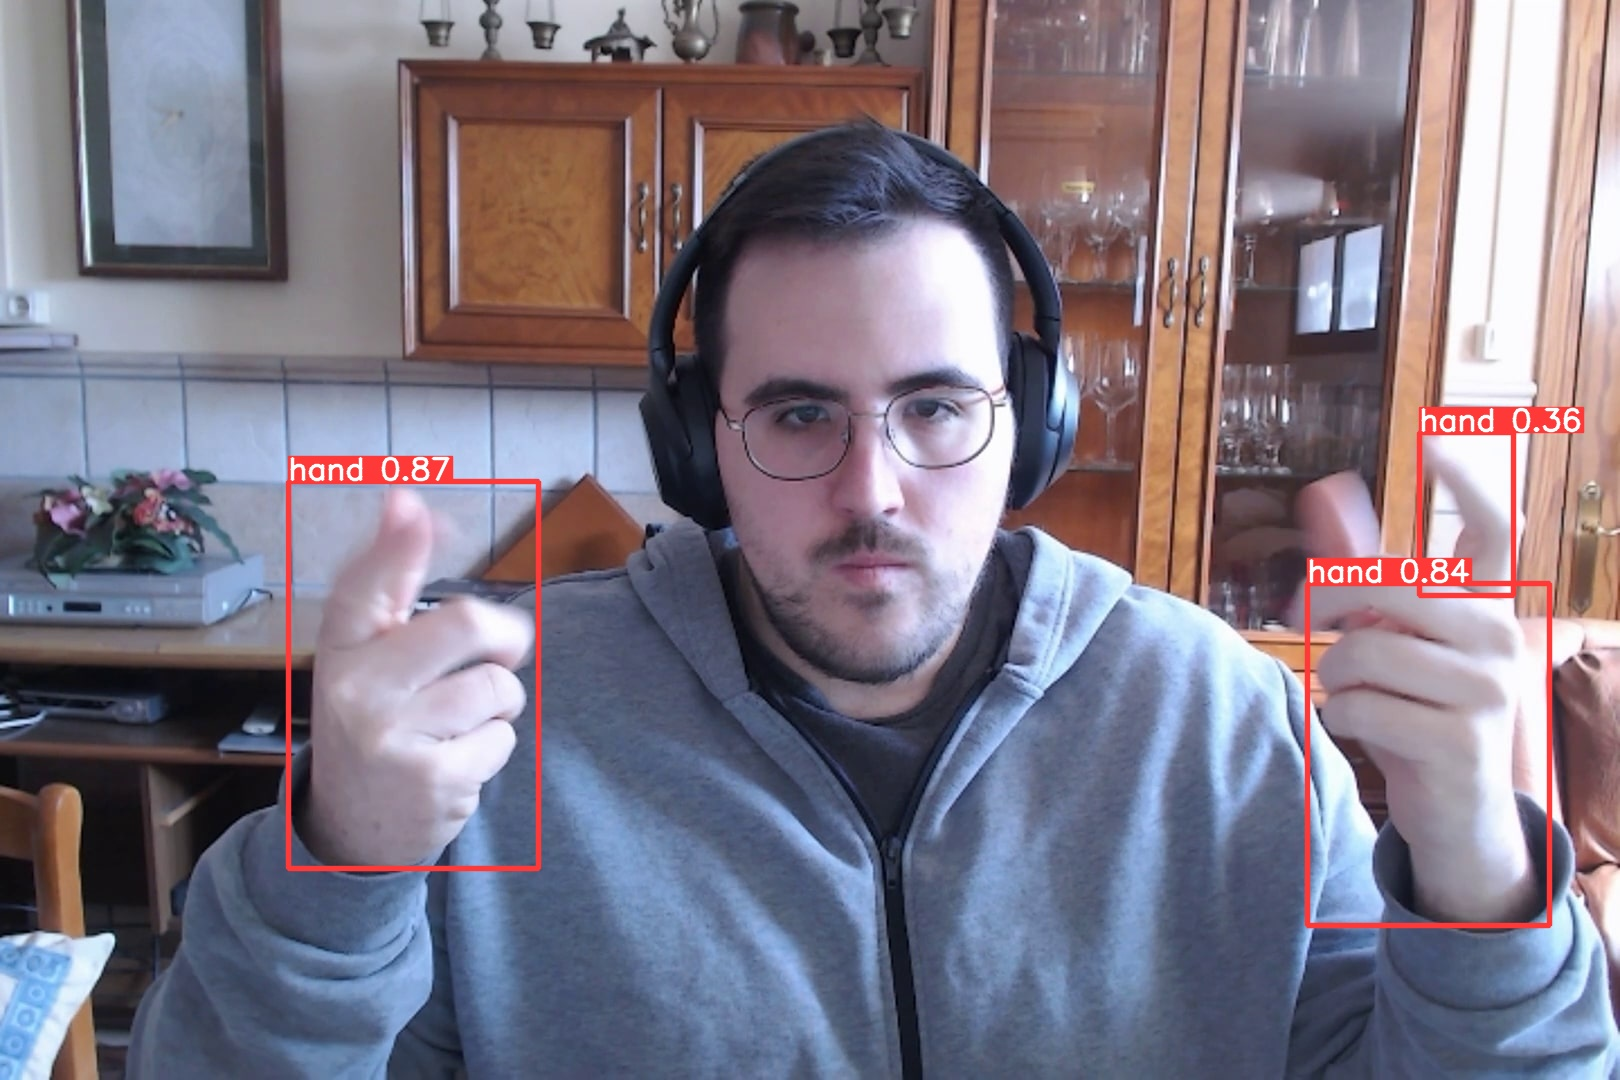

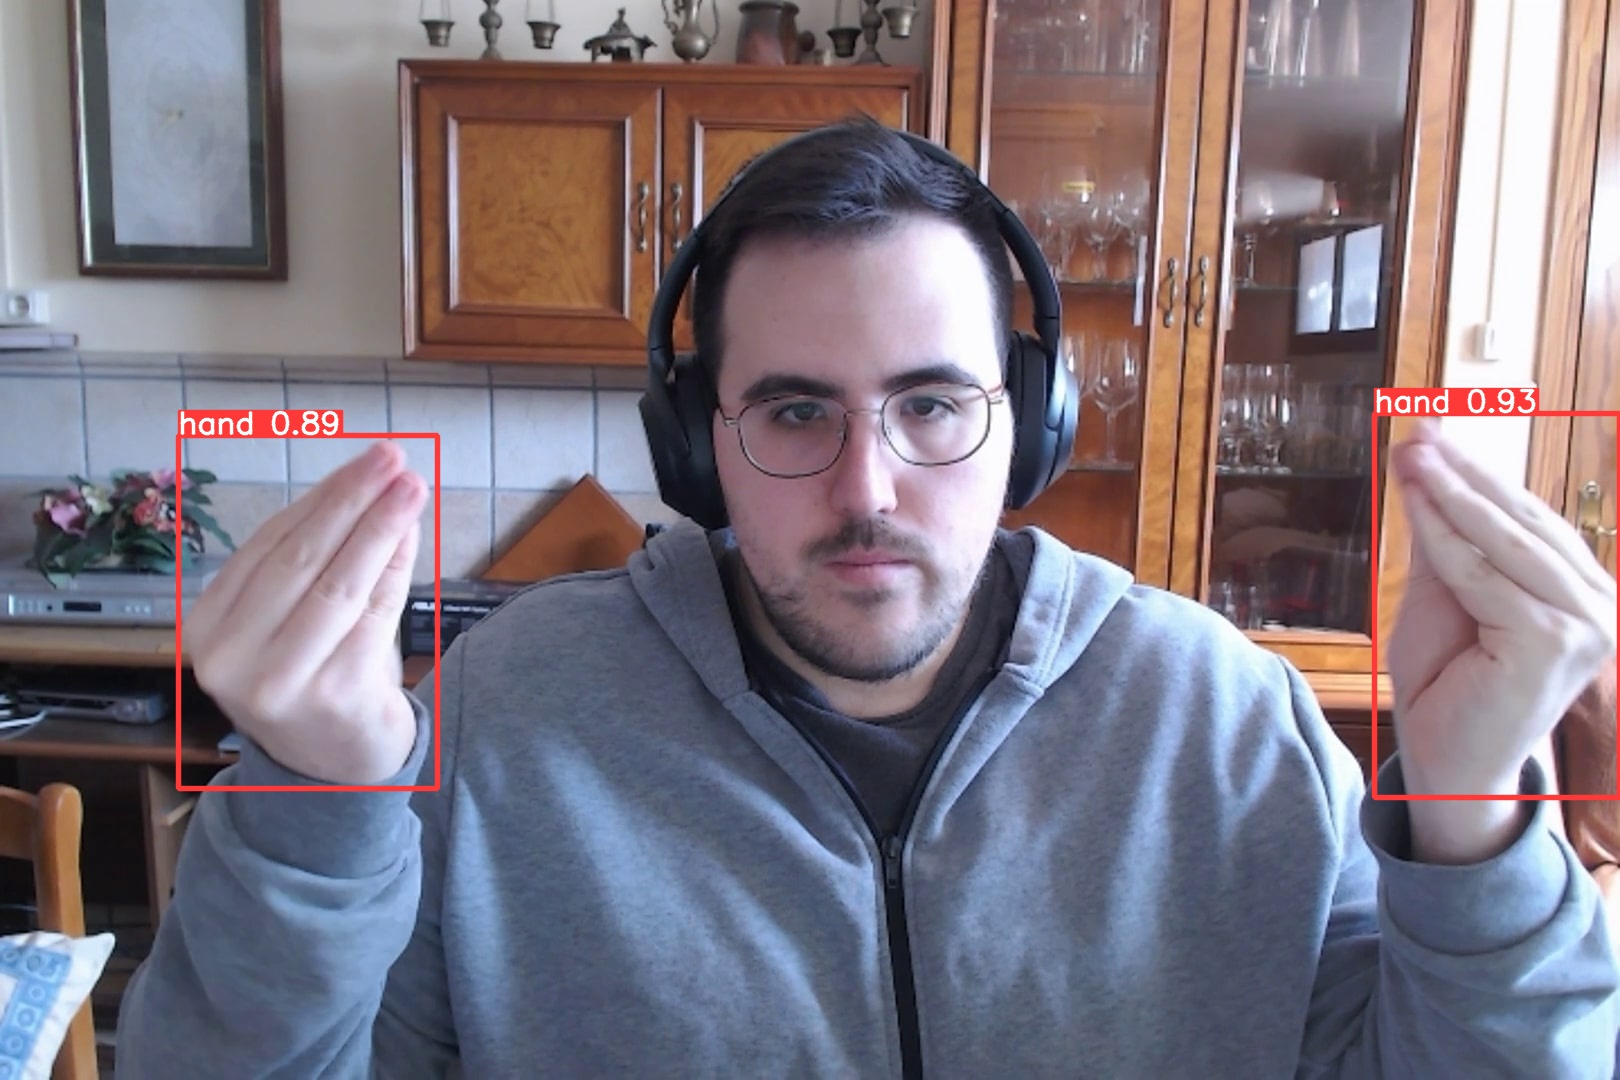

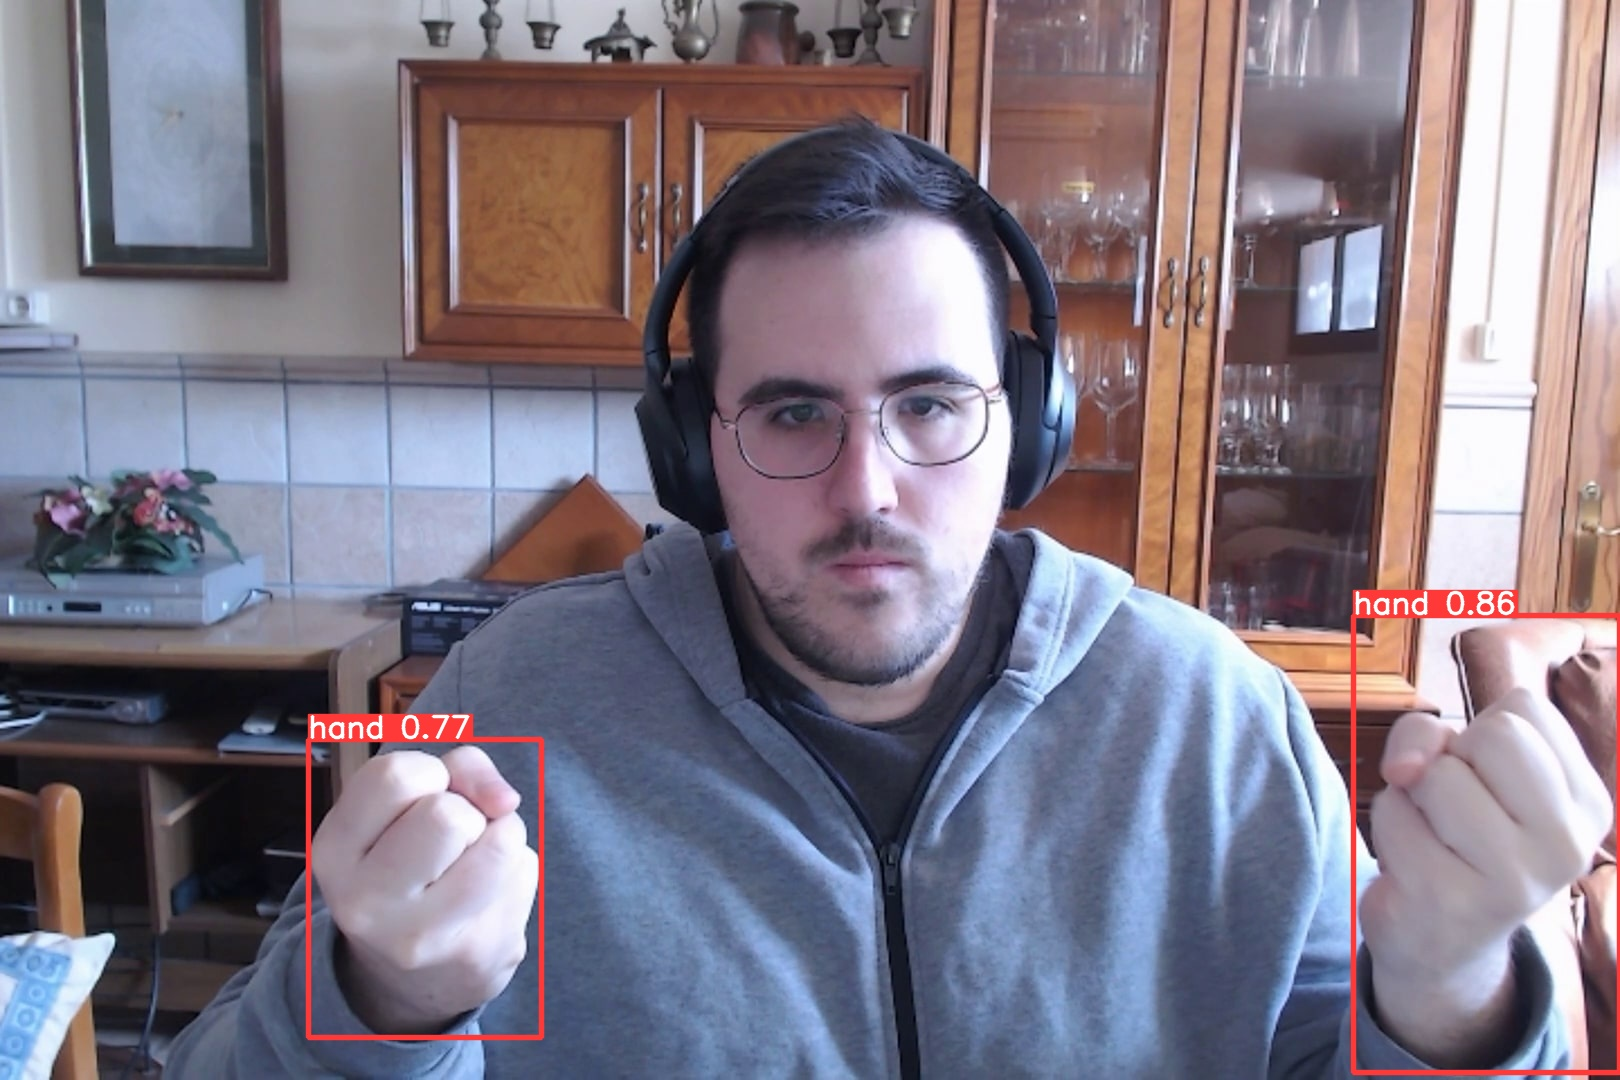

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Prueba con imagen aleatoria de Google Images

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='https://www.incimages.com/uploaded_files/image/1920x1080/getty_487484086_165811.jpg' save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
100% 280k/280k [00:00<00:00, 14.3MB/s]
image 1/1 /content/getty_487484086_165811.jpg: 480x800 1 hand, 29.1ms
Speed: 3.7ms pre-process, 29.1ms inference, 2.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2


/content


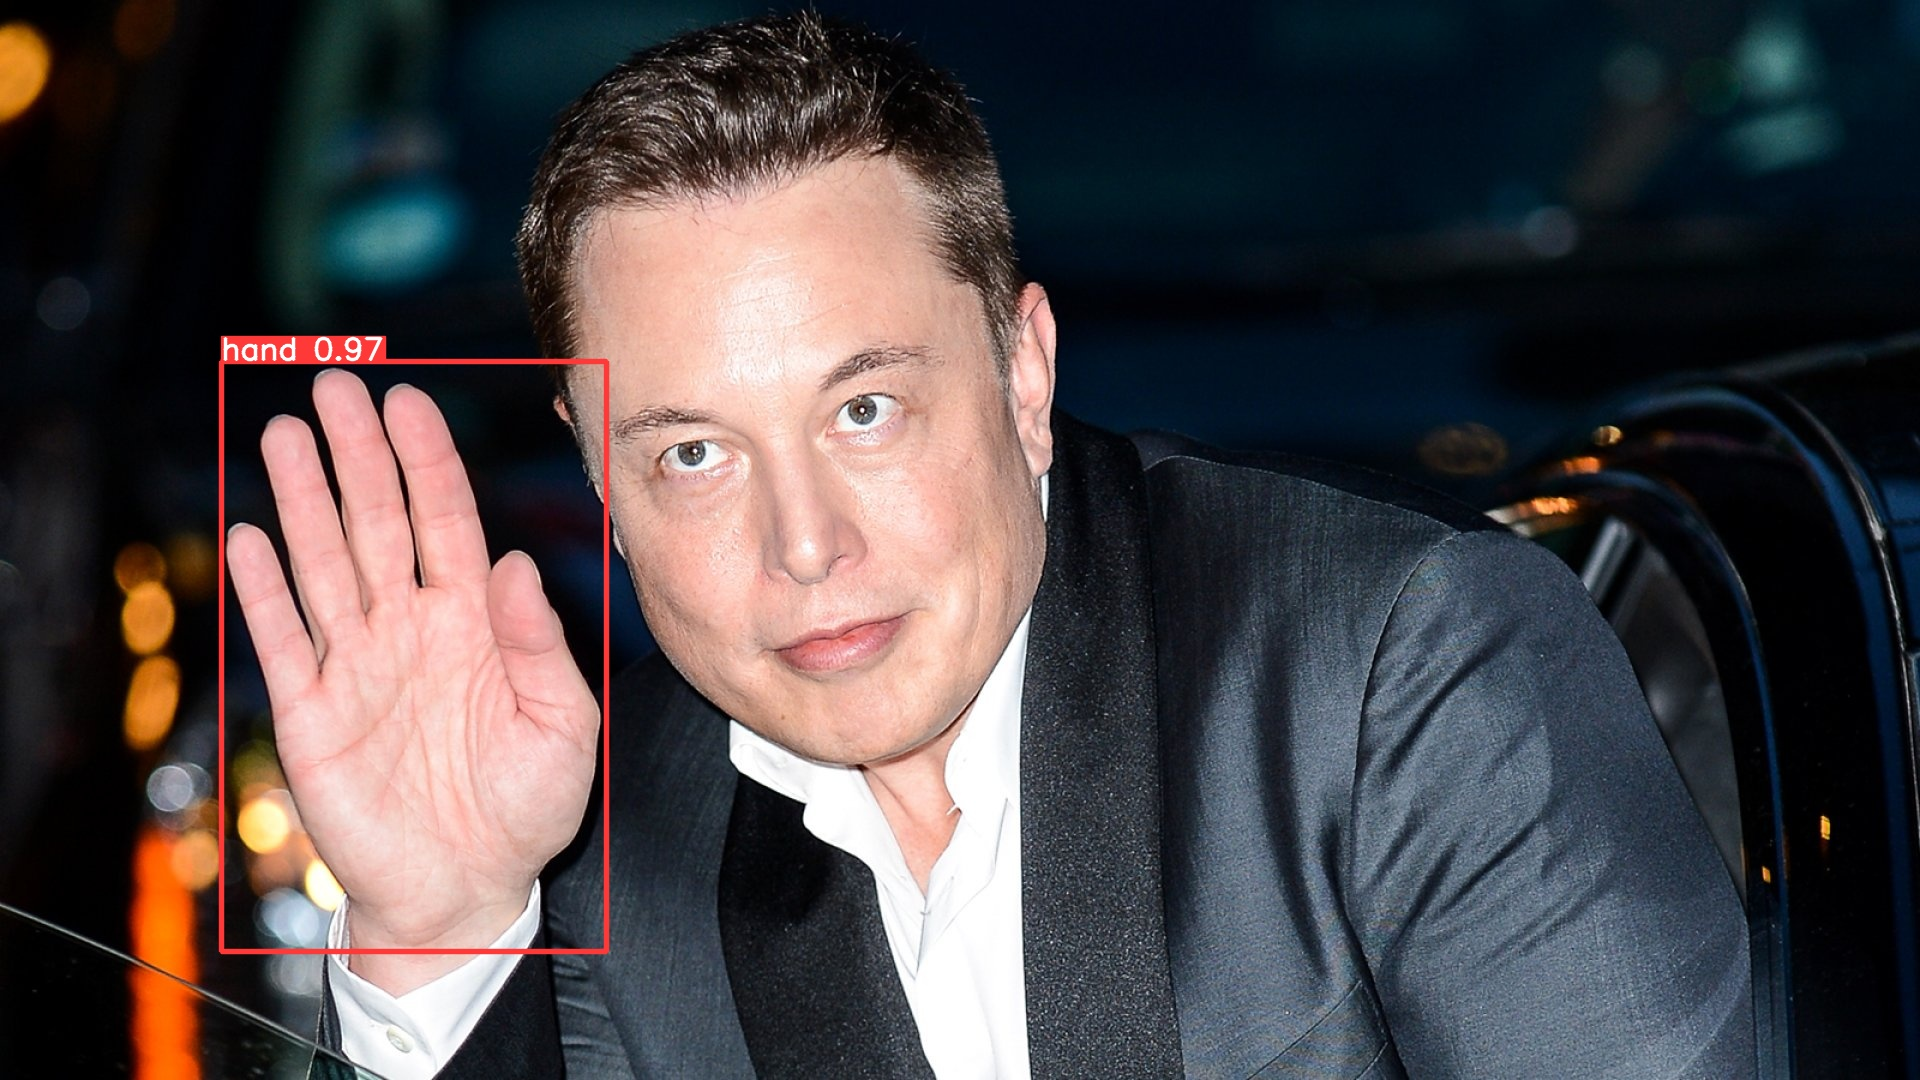

In [18]:
%cd {HOME}
Image(filename='runs/detect/predict2/getty_487484086_165811.jpg', height=600)

# Exportar modelo a Core ML para usarlo en iOS

In [19]:
!pip install coremltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.2 MB/s eta 0:00:00


In [20]:
from google.colab import files

In [21]:
!yolo export model={HOME}/runs/detect/train/weights/best.pt format=coreml

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from /content/runs/detect/train/weights/best.pt with output shape (1, 5, 13125) (21.4 MB)
2023-02-11 17:46:02.852646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 17:46:03.006732: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-11 17:46:03.936640: W tensorflow/compiler/xla/

In [22]:
files.download("/content/runs/detect/train/weights/best.mlmodel") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>